## <center> Melbourne Housing Price Prediction </center>

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Loading the dataset into a Pandas DataFrame
df = pd.read_csv('Melbourne_housing_FULL.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [3]:
import warnings
warnings.filterwarnings('ignore')

# Data Pre-processing

In [4]:
df.drop(df[['Address', 'Date', 'Postcode','Lattitude', 'Longtitude','YearBuilt']], axis = 1, inplace  =True)

In [5]:
df.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Regionname,Propertycount
0,Abbotsford,2,h,NaN,SS,Jellis,2.5,2.0,1.0,1.0,126.0,NaN,Yarra City Council,Northern Metropolitan,4019.0
1,Abbotsford,2,h,1480000.0,S,Biggin,2.5,2.0,1.0,1.0,202.0,NaN,Yarra City Council,Northern Metropolitan,4019.0
2,Abbotsford,2,h,1035000.0,S,Biggin,2.5,2.0,1.0,0.0,156.0,79.0,Yarra City Council,Northern Metropolitan,4019.0
3,Abbotsford,3,u,NaN,VB,Rounds,2.5,3.0,2.0,1.0,0.0,NaN,Yarra City Council,Northern Metropolitan,4019.0
4,Abbotsford,3,h,1465000.0,SP,Biggin,2.5,3.0,2.0,0.0,134.0,150.0,Yarra City Council,Northern Metropolitan,4019.0


In [6]:
df.describe()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Propertycount
count,34857.000000,2.724700e+04,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3.084647,1.624798,1.728845,593.598993,160.25640,7572.888306
std,0.969933,6.414671e+05,6.788892,0.980690,0.724212,1.010771,3398.841946,401.26706,4428.090313
min,1.000000,8.500000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,83.000000
25%,2.000000,6.350000e+05,6.400000,2.000000,1.000000,1.000000,224.000000,102.00000,4385.000000
50%,3.000000,8.700000e+05,10.300000,3.000000,2.000000,2.000000,521.000000,136.00000,6763.000000
75%,4.000000,1.295000e+06,14.000000,4.000000,2.000000,2.000000,670.000000,188.00000,10412.000000
max,16.000000,1.120000e+07,48.100000,30.000000,12.000000,26.000000,433014.000000,44515.00000,21650.000000


In [7]:
df.shape

(34857, 15)

### Checking Null Values in Dataframe

In [8]:
df.isna().sum()

Suburb               0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Distance             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
CouncilArea          3
Regionname           3
Propertycount        3
dtype: int64

### Filling Null Bedroom, Bathroom and Car values with median values according to House Type

In [9]:
# datframe containing median values of all columns grouped by house type
g =df.groupby(df.Type).median()
g
# There seems to be a variation in the number of Bedroom, bathroom and car according to house type

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Propertycount
Type,,,,,,,,,
h,3,1015000.0,11.2,3.0,2.0,2.0,579.0,150.0,6482.0
t,3,850000.0,10.6,3.0,2.0,2.0,208.0,132.5,6543.0
u,2,580000.0,7.2,2.0,1.0,1.0,0.0,75.0,7570.0


In [10]:
Bedroom2_type = g.Bedroom2
Bathroom_type = g.Bathroom
Car_type = g.Car

In [11]:
Bedroom2_type

Type
h    3.0
t    3.0
u    2.0
Name: Bedroom2, dtype: float64

In [12]:
df[df.Bedroom2.isna()]

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Regionname,Propertycount
15,Abbotsford,3,h,1000000.0,S,Jellis,2.5,NaN,NaN,NaN,NaN,NaN,Yarra City Council,Northern Metropolitan,4019.0
16,Abbotsford,2,t,745000.0,S,Jellis,2.5,NaN,NaN,NaN,NaN,NaN,Yarra City Council,Northern Metropolitan,4019.0
19,Abbotsford,2,u,542000.0,S,Dingle,2.5,NaN,NaN,NaN,NaN,NaN,Yarra City Council,Northern Metropolitan,4019.0
21,Abbotsford,2,u,760000.0,SP,Biggin,2.5,NaN,NaN,NaN,NaN,NaN,Yarra City Council,Northern Metropolitan,4019.0
22,Abbotsford,1,u,481000.0,SP,Purplebricks,2.5,NaN,NaN,NaN,NaN,NaN,Yarra City Council,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34838,Williamstown,2,u,450000.0,SP,Raine,6.8,NaN,NaN,NaN,NaN,NaN,Hobsons Bay City Council,Western Metropolitan,6380.0
34839,Williamstown,2,u,475000.0,SP,Greg,6.8,NaN,NaN,NaN,NaN,NaN,Hobsons Bay City Council,Western Metropolitan,6380.0
34840,Williamstown,2,u,520000.0,VB,Raine,6.8,NaN,NaN,NaN,NaN,NaN,Hobsons Bay City Council,Western Metropolitan,6380.0
34844,Windsor,1,u,440000.0,SP,Biggin,4.6,NaN,NaN,NaN,NaN,NaN,Port Phillip City Council,Southern Metropolitan,4380.0


In [13]:
df['Bedroom2'] = df.apply(lambda x: Bedroom2_type[x['Type']] if pd.isna(x['Bedroom2']) else x['Bedroom2'], axis = 1)

In [14]:
df['Bathroom'] = df.apply(lambda x: Bathroom_type[x['Type']] if pd.isna(x['Bathroom']) else x['Bathroom'], axis = 1)

In [15]:
df['Car'] = df.apply(lambda x: Car_type[x['Type']] if pd.isna(x['Car']) else x['Car'], axis = 1)

In [16]:
# rounding off Price value in Dataframe
df['Price'] = df['Price'].round(2)

### Filling Null values with mean values of respective columns

In [17]:
# datframe containing mean values of all columns grouped by house type
b =df.groupby(df.Type).mean()
b
# There seems to be a huge difference in the mean values of Landsize according to house type

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Propertycount
Type,,,,,,,,,
h,3.357298,1.203718e+06,12.174207,3.286822,1.738616,1.889199,644.703176,178.201163,7393.864251
t,2.913408,9.310772e+05,10.673128,2.931006,1.922067,1.784637,298.617629,147.710934,7339.341341
u,2.016445,6.279434e+05,8.185117,1.985885,1.113334,1.082089,478.948423,81.668625,8275.840186


In [18]:
Landsize_type = b.Landsize
Building_type = b.BuildingArea

#### Filling missing values in Landsize and Building Area columns by House type

In [19]:
df['Landsize'] = df.apply(lambda x: Landsize_type[x['Type']] if pd.isna(x['Landsize']) else x['Landsize'], axis = 1)
df['BuildingArea'] = df.apply(lambda x: Building_type[x['Type']] if pd.isna(x['BuildingArea']) else x['BuildingArea'], axis = 1)

In [20]:
# Filling null distance value
df['Distance'] = df['Distance'].fillna(df['Distance'].mean())

### Checking other anomalies in the dataset

In [21]:
zero_cols = (df == 0).any()
# print the columns with values equal to zero
print(zero_cols[zero_cols == True].index)

Index(['Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea'], dtype='object')


##### It is unusual for Distance, Bedroom and Bathroom having values equal to zero for a house. Since the number of rows having such anomalies are negligible compared to the dataset thererfore dropping those rows.

In [22]:
df[df.Bathroom == 0].shape

(46, 15)

In [23]:
df[df.Bedroom2 == 0].shape

(17, 15)

In [24]:
df[df.Distance == 0].shape

(77, 15)

In [25]:
df = df.loc[df['Bedroom2'] != 0]
df = df.loc[df['Bathroom'] != 0]
df = df.loc[df['Distance'] != 0]

####  Filling empty rows (zero values) in Landsize and Building Area columns by House type

In [26]:
df[df.Landsize ==0].shape

(2404, 15)

In [27]:
df[df.BuildingArea ==0].shape

(76, 15)

In [28]:
df['Landsize'] = df.apply(lambda x: Landsize_type[x['Type']] if (x['Landsize'] == 0) else x['Landsize'], axis = 1)
df['BuildingArea'] = df.apply(lambda x: Building_type[x['Type']] if(x['BuildingArea'] == 0) else x['BuildingArea'], axis = 1)

### Checking Average price of house group by number of rooms

In [29]:
r =df.groupby(df.Rooms).mean()

In [30]:
Price_room = r.Price
Price_room

Rooms
1     4.322481e+05
2     7.600138e+05
3     1.027791e+06
4     1.369566e+06
5     1.818862e+06
6     1.882613e+06
7     1.791675e+06
8     1.716858e+06
9     1.380000e+06
10    2.018000e+06
12    2.705000e+06
16    5.000000e+06
Name: Price, dtype: float64

### Filling Null Price values with Average price according to Number of rooms

In [31]:
df['Price'] = df.apply(lambda x: Price_room[x['Rooms']] if pd.isna(x['Price']) else x['Price'], axis = 1)

In [32]:
df['Price'] = df['Price'].round(2)

### Dropping all remaining rows containing any null values

In [33]:
df.dropna(inplace = True)

In [34]:
# all null values removed
df.isna().sum()

Suburb           0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Distance         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
CouncilArea      0
Regionname       0
Propertycount    0
dtype: int64

## Feature Engineering

In [37]:
# it is not possible for Building area to be greater than Landsize. Thus, removing such outliers.
df1 = (df[~(df.Landsize<df.BuildingArea)])

In [38]:
df2 = df1.copy()

In [39]:
df2['Per_square_meter_price'] = df.Price/df.BuildingArea

In [40]:
df2['Suburb'] = df2.Suburb.apply(lambda x: x.strip())

In [41]:
loc_stats =df2.groupby('Suburb')['Suburb'].agg('count').sort_values(ascending = False)
loc_stats

Suburb
Reservoir         832
Bentleigh East    576
Glen Iris         482
Preston           470
Kew               464
                 ... 
Monbulk             1
Avonsleigh          1
Belgrave            1
Olinda              1
viewbank            1
Name: Suburb, Length: 350, dtype: int64

In [42]:
len(loc_stats[loc_stats<=10])

69

In [43]:
loc_stats_10 = loc_stats[loc_stats<=10]
loc_stats_10

Suburb
Hallam          10
Diggers Rest    10
Mickleham       10
Coolaroo        10
Notting Hill     9
                ..
Monbulk          1
Avonsleigh       1
Belgrave         1
Olinda           1
viewbank         1
Name: Suburb, Length: 69, dtype: int64

#### Grouping all suburbs as 'others' having less than or equal to 10 occurrence 

In [44]:
df2['Suburb'] = df2.Suburb.apply(lambda x: 'others' if x in loc_stats_10 else x)
df2.shape

(33595, 16)

In [45]:
df3 = df2.copy()

#### Checking size of bedrooms and removing if any outliers exist

In [46]:
#Creating a general threshold for the size of bedrooms
df3[(df3.BuildingArea/df3.Bedroom2) <= 10]

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Regionname,Propertycount,Per_square_meter_price
41,Abbotsford,3,u,1090000.0,S,Jellis,2.5,3.0,2.0,2.0,4290.0,27.0,Yarra City Council,Northern Metropolitan,4019.0,40370.370370
55,Abbotsford,3,h,1290000.0,S,Biggin,2.5,3.0,2.0,2.0,147.0,18.0,Yarra City Council,Northern Metropolitan,4019.0,71666.666667
242,Altona,3,h,1335000.0,S,hockingstuart,13.8,3.0,1.0,4.0,777.0,22.0,Hobsons Bay City Council,Western Metropolitan,5301.0,60681.818182
278,Altona,3,u,730000.0,SP,Barlow,13.8,3.0,2.0,1.0,70.0,3.0,Hobsons Bay City Council,Western Metropolitan,5301.0,243333.333333
392,Armadale,3,u,735000.0,PI,Marshall,6.3,3.0,2.0,1.0,2113.0,14.0,Stonnington City Council,Southern Metropolitan,4836.0,52500.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32893,Taylors Lakes,4,h,791000.0,S,Reliance,15.5,4.0,2.0,2.0,750.0,30.0,Brimbank City Council,Western Metropolitan,5336.0,26366.666667
33346,Footscray,2,t,620000.0,S,Jas,5.1,2.0,1.0,0.0,104.0,2.0,Maribyrnong City Council,Western Metropolitan,7570.0,310000.000000
33358,Gladstone Park,3,h,700000.0,S,Ray,12.9,3.0,2.0,1.0,591.0,19.0,Hume City Council,Western Metropolitan,3285.0,36842.105263
33479,Kings Park,3,h,585000.0,SP,Frank,14.0,3.0,1.0,4.0,706.0,18.0,Brimbank City Council,Western Metropolitan,2878.0,32500.000000


In [47]:
# removing all such rows where bedroom size is less than 10 sq meters
df4 = df3[~((df3.BuildingArea/df3.Bedroom2) <= 10)]
df4.shape

(33427, 16)

In [48]:
df4.Per_square_meter_price.describe() 

count    33427.000000
mean      7258.522278
std       3397.703056
min        764.119601
25%       5069.355308
50%       6733.962800
75%       8779.269551
max      76923.076923
Name: Per_square_meter_price, dtype: float64

In [49]:
subdf = df4.groupby('Suburb')['Per_square_meter_price'].std().sort_values(ascending = False)
subdf

Suburb
Parkville       7412.807059
Mulgrave        7344.715071
Toorak          6682.459739
Middle Park     5998.783800
Brighton        5896.073851
                   ...     
Doreen          1036.619164
Derrimut        1025.896313
Keilor Downs    1007.249490
Taylors Hill     866.335678
Gowanbrae        749.186631
Name: Per_square_meter_price, Length: 282, dtype: float64

In [50]:
# grouping separate dataframes by Suburb and removing outliers for each Suburb based on their Per square meter price.
def remove_outlier_ppp(df4):
    df_out = pd.DataFrame()
    for key, subdf in df4.groupby('Suburb'):
        m = np.mean(subdf.Per_square_meter_price)
        st = np.std(subdf.Per_square_meter_price)
        new_df = subdf[(subdf.Per_square_meter_price> (m-st)) & (subdf.Per_square_meter_price<= (m+st))]
        df_out = pd.concat([df_out, new_df], ignore_index = True)
    return df_out     
        
    
    
df5 = remove_outlier_ppp(df4) 

In [51]:
df5.shape

(25339, 16)

In [52]:
df5.Bedroom2

0        2.0
1        3.0
2        4.0
3        2.0
4        6.0
        ... 
25334    2.0
25335    3.0
25336    3.0
25337    4.0
25338    4.0
Name: Bedroom2, Length: 25339, dtype: float64

In [53]:
# renaming columns
df5 = df5.rename(columns={'Bedroom2': 'Bedrooms' })

In [54]:
df6 = df5.copy()

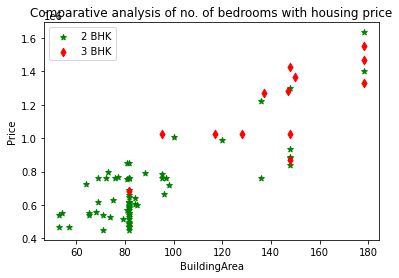

<Figure size 720x1440 with 0 Axes>

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_bhk_price(df, Suburb):
    df_bhk2 = df5[(df5.Suburb == Suburb) & (df5.Bedrooms == 2)]
    df_bhk3 = df5[(df5.Suburb == Suburb) & (df5.Bedrooms == 3)]
    plt.scatter(df_bhk2.BuildingArea,df_bhk2.Price,  marker = '*', color = 'green', label = '2 BHK')
    plt.scatter(df_bhk3.BuildingArea,df_bhk3.Price, marker = 'd', color = 'red', label = '3 BHK')
    plt.title('Comparative analysis of no. of bedrooms with housing price')
    plt.xlabel('BuildingArea')
    plt.ylabel('Price')
    plt.legend()
    plt.show
    plt.figure(figsize = (10, 20))
    
    
plot_bhk_price(df5, 'North Melbourne')  
    

#### It can be observed that for the same Building Area the price of 2 Bhk are more than that of 3 BHK. Thus removing such outliers.

###### We are building a function which will create new dataframes grouped by location Then we will create sub dataframes grouped by no. of bedrooms. For each sub-dataframe for particular location and no. of bedrooms we will try to compare the price_per_square_meter   of the 'n' bedroom house with the mean price of 'n-1' bedroom price and remove outliers.

In [56]:
def remove_bedroom_outliers(df6):
    exclude_data_points = np.array([])
    for Suburb, Suburb_df in df6.groupby('Suburb'):
        bedroom_stats = {}
        for bedroom, bedroom_df in Suburb_df.groupby('Bedrooms'):
            bedroom_stats[bedroom] = {'mean' : np.mean(bedroom_df.Per_square_meter_price),
                                      'std' : np.std(bedroom_df.Per_square_meter_price),
                                      'count' : bedroom_df.shape[0]
                
                
            }
        for bedroom, bedroom_df in Suburb_df.groupby('Bedrooms'):
            stats_previous = bedroom_stats.get(bedroom-1)
            if stats_previous and stats_previous['count'] > 5:
                exclude_data_points = np.append( exclude_data_points, bedroom_df[bedroom_df.Per_square_meter_price < (stats_previous['mean'])].index.values)
    return df6.drop(exclude_data_points, axis = 'index')         
     
    

In [57]:
df7 = remove_bedroom_outliers(df6)
df7

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Bedrooms,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Regionname,Propertycount,Per_square_meter_price
0,Abbotsford,2,h,1480000.00,S,Biggin,2.5,2.0,1.0,1.0,202.000000,178.201163,Yarra City Council,Northern Metropolitan,4019.0,8305.220787
2,Abbotsford,3,h,1876000.00,S,Nelson,2.5,4.0,2.0,0.0,245.000000,210.000000,Yarra City Council,Northern Metropolitan,4019.0,8933.333333
3,Abbotsford,2,u,760013.78,PI,Biggin,2.5,2.0,2.0,1.0,4292.000000,82.000000,Yarra City Council,Northern Metropolitan,4019.0,9268.460732
4,Abbotsford,4,h,1369566.05,W,Biggin,2.5,6.0,2.0,0.0,230.000000,147.000000,Yarra City Council,Northern Metropolitan,4019.0,9316.775850
6,Abbotsford,2,u,542000.00,S,Dingle,2.5,2.0,1.0,1.0,478.948423,81.668625,Yarra City Council,Northern Metropolitan,4019.0,6636.575519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25332,others,3,h,1027791.35,PI,Barry,27.0,3.0,1.0,2.0,1015.000000,178.201163,Knox City Council,Eastern Metropolitan,1690.0,5767.590598
25333,others,4,h,865000.00,S,Raine,45.9,4.0,2.0,0.0,42800.000000,180.000000,Macedon Ranges Shire Council,Northern Victoria,249.0,4805.555556
25334,others,2,u,522000.00,S,Purplebricks,18.7,2.0,1.0,1.0,478.948423,81.668625,Kingston City Council,South-Eastern Metropolitan,1048.0,6391.683434
25336,others,3,h,1027791.35,SN,McGrath,24.8,3.0,2.0,2.0,644.703176,178.201163,Knox City Council,South-Eastern Metropolitan,2126.0,5767.590598


### Plotting a histogram on various features

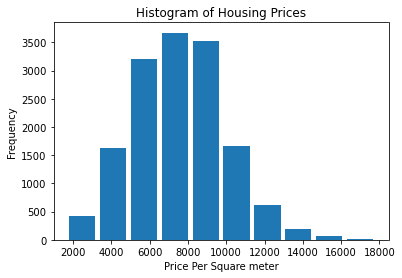

In [58]:
plt.hist(df7.Per_square_meter_price, rwidth = 0.85)
plt.title('Histogram of Housing Prices')
plt.xlabel('Price Per Square meter')
plt.ylabel('Frequency')
plt.show()

#### Data follows normal distribution and has a bell curve shape. So far so good.

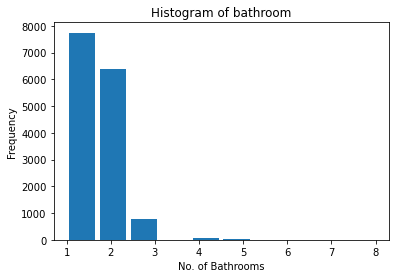

In [59]:
plt.hist(df7.Bathroom, rwidth = 0.85)
plt.title('Histogram of bathroom')
plt.xlabel('No. of Bathrooms')
plt.ylabel('Frequency')
plt.show()

### Using Pandas get dummies Method to convert all categorical variables to binary data (One-hot encoding)

In [60]:
df8 = df7.copy()

In [61]:
inputs =  pd.get_dummies(df8, drop_first = True)
inputs.shape

(15008, 650)

In [62]:
inputs.drop(inputs[['Price','Per_square_meter_price']], axis =1, inplace = True)

In [63]:
target = df7.Price

In [64]:
target.shape

(15008,)

## Model Building

### Applying different Machine Learning Algorithms with various techniques

###  1. Trying out Linear Regression 

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size = 0.2)

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
reg = LinearRegression()

In [69]:
reg.fit(X_train, y_train)

LinearRegression()

In [70]:
# Poor performance
reg.score(X_test, y_test)

0.6321655228123454

In [71]:
# model doing well in training set
reg.score(X_train, y_train)

0.8679194814390513

##### Our linear regression model is overfitting. Applying regularization techniques.
### Trying Lasso and Ridge Regression Technique to improve model performance.

In [72]:
from sklearn.linear_model import Lasso

In [73]:
# Lasso Regression
lasso_reg = Lasso(alpha = 10 ,tol = 0.001)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=10, tol=0.001)

In [74]:
lasso_reg.score(X_test, y_test)

0.854942584636137

In [75]:
from sklearn.linear_model import Ridge

In [76]:
# Ridge Regression
ridge_reg = Ridge(alpha = 10, tol = 0.001)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=10)

In [77]:
ridge_reg.score(X_test, y_test)

0.8518199823468752

### Using Decision Tree Regressor Algorithm

In [78]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [79]:
model_tree = DecisionTreeRegressor()
model_tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [80]:
model_tree.score(X_test, y_test)

0.821038922857011

### Using Random Forest Regressor Algorithm

In [81]:
from sklearn.ensemble import RandomForestRegressor

In [82]:
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

RandomForestRegressor()

In [83]:
forest.score(X_test,y_test)

0.9002877555104966

### Using eXtreme Gradient Boosting (XGBoost) Algorithm

In [84]:
!pip install xgboost
import xgboost as xgb

In [85]:
model_xgb = xgb.XGBRegressor()
params = {'learning_rate': 0.25, 'n_estimators': 100}
model_xgb = xgb.XGBRegressor(**params)
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.25, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [86]:
model_xgb.score(X_test, y_test)

0.9114641510594832

### Model performace so far (in order):
#### 1. XGBoost
#### 2. Random Forest Regressor
#### 3. Decision Tree Regressor
#### 4. Lasso Regresion 
#### 5. Ridge Regression
#### 6. Linear Regression

#### Taking the top three algorithms and using GridSearchCV for best model selection and hyperparameter tuning.

In [90]:
# Using XGBoost, Random Forest Regressor and Lasso Regression for Hyperparameter tuning
#Using K-fold Cross Validation Score to get a more reliable estimate of the model's performance than testing on a single split of the data.
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
def Find_best_model(X,y):
    algos = {'XGBoost' : {'model': xgb.XGBRegressor(), 'params': {'learning_rate': [0.1, 0.25, 0.3, 0.5], 'n_estimators': [10,100, 200]}},
             'Lasso' : {'model': Lasso(), 'params': {'alpha': [1,5,10,15], 'selection': ['random', 'cyclic']}},
             'Random Forest': {'model' : RandomForestRegressor(), 'params': {'n_estimators' : [10, 100, 200]}}       
    }

    scores_model = []
    cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 42)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'],config['params'], cv = cv, return_train_score = False)
        gs.fit(X,y)
        scores_model.append({'model': algo_name,
                      'best_score': gs.best_score_.round(2),
                      'best_parameters': gs.best_params_})
        
    return pd.DataFrame(scores_model, columns = ['model','best_score','best_parameters'])


Find_best_model(inputs, target)
        

,model,best_score,best_parameters
0,XGBoost,0.91,"{'learning_rate': 0.25, 'n_estimators': 200}"
1,Lasso,0.86,"{'alpha': 15, 'selection': 'random'}"
2,Random Forest,0.91,{'n_estimators': 200}


#### Tabulating metrics of each model in a dataframe

In [91]:
# Define a function to calculate metrics for a given model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
def calculate_metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    return {'R2 Score': r2, 'MAE': mae, 'MSE': mse}

# Define a list of models to evaluate
models = [
    {'name': 'Lasso Regression', 'model': Lasso(alpha = 15, selection = 'cyclic')},
    {'name': 'Random Forest', 'model': RandomForestRegressor(n_estimators=200)},
    {'name': 'XGBoost', 'model': xgb.XGBRegressor(learning_rate = 0.25, n_estimators=200)}
]

# Create a dataframe to store the results
results_df = pd.DataFrame(columns=['Model', 'R2 Score', 'MAE', 'MSE'])

# Evaluate each model and store the results in the dataframe
for model_info in models:
    model_name = model_info['name']
    model = model_info['model']
    model.fit(X_train, y_train)
    metrics = calculate_metrics(model, X_test, y_test)
    results_df = results_df.append({'Model': model_name, **metrics}, ignore_index=True)

# Display the results dataframe
display(results_df)

,Model,R2 Score,MAE,MSE
0,Lasso Regression,0.855093,152329.011695,4.487118e+10
1,Random Forest,0.901869,112820.138824,3.038656e+10
2,XGBoost,0.911880,112468.715307,2.728677e+10


In [122]:
inputs.shape

(15008, 648)

###### The curse of dimensionality refers to the problem of increasing the number of features or dimensions in a dataset,  which can cause a significant increase in computational complexity and decrease in predictive performance. 


## Feature Reduction

### Applying Principal Component Analysis to reduce dimensionality and computation time

In [93]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [104]:
# Define empty lists to store the results
scores_model = []
pca_components = [10, 50, 100]

# Define a list of models with best hyperparameters to evaluate
models = [
    ('Linear Regression', LinearRegression(), {}),
    ('Random Forest', RandomForestRegressor(), {'n_estimators': [200]}),
    ('XGBoost', xgb.XGBRegressor(), {'n_estimators': [200]})
]
for n_components in pca_components:
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
   
    
    for model_name in models:
      
#using gridsearchcv to select the best model and the number of pca_components for best performance    
        # Perform grid search cross-validation to find the best model parameters
        gs = GridSearchCV(model_name[1], model_name[2], cv=5, n_jobs=-1)
        gs.fit(X_train_pca, y_train)
        
        scores_model.append({'components': n_components,
                      'model': model_name[0],
                      'best_score': gs.best_score_,
                      'best_parameters': gs.best_params_})
        
df_results = pd.DataFrame(scores_model, columns = ['components','model','best_score','best_parameters'])
df_results
  



        
        
       
       

,components,model,best_score,best_parameters
0,10,Linear Regression,0.764704,{}
1,10,Random Forest,0.891575,{'n_estimators': 200}
2,10,XGBoost,0.894004,{'n_estimators': 200}
3,50,Linear Regression,0.805343,{}
4,50,Random Forest,0.893343,{'n_estimators': 200}
5,50,XGBoost,0.894589,{'n_estimators': 200}
6,100,Linear Regression,0.822078,{}
7,100,Random Forest,0.895051,{'n_estimators': 200}
8,100,XGBoost,0.894789,{'n_estimators': 200}


In [120]:
df_pca_results = df_results.sort_values(by='best_score', ascending=False, ignore_index = True)
df_pca_results

,components,model,best_score,best_parameters
0,100,Random Forest,0.895051,{'n_estimators': 200}
1,100,XGBoost,0.894789,{'n_estimators': 200}
2,50,XGBoost,0.894589,{'n_estimators': 200}
3,10,XGBoost,0.894004,{'n_estimators': 200}
4,50,Random Forest,0.893343,{'n_estimators': 200}
5,10,Random Forest,0.891575,{'n_estimators': 200}
6,100,Linear Regression,0.822078,{}
7,50,Linear Regression,0.805343,{}
8,10,Linear Regression,0.764704,{}


#### Using PCA we were able to reduce our features from 648 to 10 and were still able to get almost the same model accuracy. 

In [123]:
#Creating a dictionary to store model accuracy for different models
model_acc_dict = {'Random_Forest' : {'Without Dimensionality Reduction' : '91%', 'With PCA' : '89.5%'}, 
                  'XGBoost': {'Without Dimensionality Reduction' : '91%', 'With PCA' : '89.5%'},
                 'Linear Regression': {'Without Dimensionality Reduction' : '86%', 'With PCA' : '82.2%'},
                 }


In [129]:
# Dataframe to display pca and non-pca models
df_model_accuracy = pd.DataFrame(model_acc_dict)
df_model_accuracy
# We can use Random Forest and XGBoost with PCA as to significantly reduce computation time and get almost the same results.

,Random_Forest,XGBoost,Linear Regression
Without Dimensionality Reduction,91%,91%,86%
With PCA,89.5%,89.5%,82.2%


## Clearly Random Forest Regressor and XG Boost is our winner with an accuracy of 91% !